## Table of Contents <a id = Contents></a>
* [1.0 Preliminary Work](#pre_work)
    * [1.1 Context](#context)
    * [1.2 Key Data Sources](#key-data-sources)
    * [1.3 Problem Statement](#problem-statement)
* [2.0 Exploratory Data Analysis (EDA)](#eda)
    * [2.1 Cleaning, Feature Engineering, Preprocessing & Visualization](#cleaning)
* [3.0 Models](#models)
    * [3.1 Random Forest](#rf)
    * [3.2 linear Regression](#lr)
   
* [4.0 Testing & Evaluation](#testing_evaluation)
    * [4.1 Test Data - Cleaning & Preprocessing](#tdcap)
    * [4.2 Retrain Model w/ Full Training Data](#rm)
***

<h2>1.0 Preliminary Work</h2> <a id = 'pre_work'></a>

***

<h3>1.1 Context</h3> <a id = 'context'></a>

This project attempts to predict sales prices for homes in Ames, Iowa based on features of the house. This is known as a Hedonic Pricing Model. The goal is to use linear regression to identify the dollar value shift per unit change for key features of the property.

<h3>1.2 Key Data Sources</h3><a id = key-data-sources></a>

1. Iowa has a really great database for property sales data and has a good amount of features. The data can be retrieved from the City of Ames, government website [here](https://www.cityofames.org/government/departments-divisions-a-h/city-assessor/reports). The associated data dictionary can be retrieved from there as well.


<h2><span style="color:darkred">1.3 Problem Statement</span></h2><a id = problem-statement></a>

**How to build an effective model that isolates the relationship between features and dollar value change per unit feature, while simultaneously not sacrificing accuracy**

<h2>2.0 Exploratory Data Analysis (EDA)</h2><a id = eda></a>

***

<h3>2.1 Cleaning, Feature Engineering, Preprocessing & Visualization</h3> <a id = 'cleaning'></a>

In [1]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# train.csv file provided by Kaggle
fdata = pd.read_csv('ames_real_estate_data.csv')
data_dict  = pd.read_csv('data_dict.csv')

In [3]:
# check view settings
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)


In [4]:
# view the data
display(fdata.head())
display(data_dict)

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,NaN,1007360045,0,0,2635 SE 16TH ST,hoc,NaN,O-GSE,NaN,COMMERCIAL,RETAIL STORE,DAYTON PARK SD 2ND ADD LOT:6 \n AMES,1,1,EXCHANGERIGHT NET LEASED PORTFOLIO 50 DST,NaN,PO BOX 60308,NaN,PASADENA,CA,91116.0,NaN,2021.0,9.0,202112325,2021.0,9.0,NaN,107700,707500,0,815200,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,1.07,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,2635,SE,16TH,ST,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,NaN
1,520400003.0,520400003,0,0,4499 CARTIER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 6TH ADD \nOUTLOT YY\n AMES,5,45,HUNZIKER DEVELOPMENT GROUP LLC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2021.0,8.0,202110700,2021.0,8.0,MSC,339200,0,0,339200,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.00,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4499,NaN,CARTIER,AVE,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,NaN
2,520440010.0,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:16 \n AMES,5,45,GENESIS HOMES INC,NaN,750 SE ALICE'S RD,NaN,WAUKEE,IA,50263.0,NaN,2021.0,3.0,2021-02822,2021.0,3.0,WD,5700,0,0,5700,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.00,NRidgHt,12493.0,Vac.Lot,0,0,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,2.0,78000.0,WRDConv,Normal,Deed,4507,NaN,EVEREST,AVE,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,0.0
3,520440020.0,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,SCENIC VALLEY SD 4TH ADD LOT:17 \n AMES,5,45,"YOUNGER, TOYIA KIANA",NaN,4513 EVEREST AVE,NaN,AMES,IA,50014.0,NaN,2021.0,7.0,2021-09126,2021.0,7.0,WD,96300,0,288800,385100,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.00,NRidgHt,9595.0,Dwg&Lot,0,1,1FamDet,2020.0,1-Story,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,1487.0,1487.0,7.0,1.0,0.0,Attachd,2020.0,3.0,641.0,2021.0,7.0,408905.0,NewSold,Partial,Deed,4513,NaN,EVEREST,AVE,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,2.0
4,520440030.0,520440030,0,0,4519 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 6TH ADD LOT:19 \n AMES,5,45,HUNZIKER DEVELOPMENT GROUP LLC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2021.0,8.0,202110700,2021.0,8.0,NaN,5100,0,0,5100,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.00,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4519,NaN,EVEREST,AVE,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,NaN


,Field Number,Field Name,Field Start Position,Field Length,Data Type,Description,Notes
0,1,MapRefNo,1,10,Text,Map Reference Number: unique ID for map parcel,No Dashes!!!
1,2,GeoRefNo,11,10,Text,Geo Reference Number: non-unique ID for property,No Dashes!!!
2,3,Tier,21,6,Integer,Tier,Did not bring in when converting to TylerX
3,4,Range,27,6,Integer,Range,Did not bring in when converting to TylerX
4,5,Prop_Addr,33,255,Text,Complete Property Address (7 fields concatenat...,NaN
5,6,ZngCdPr,288,5,Text,"Zoning Code, Primary",NaN
6,7,ZngCdSc,293,5,Text,"Zoning Code, Secondary",NaN
7,8,ZngOLPr,298,5,Text,"Zoning Code -- P & Z Overlay/Floating, Primary",NaN
8,9,ZngOLSc,303,5,Text,"Zoning Code -- P & Z Overlay/Floating, Secondary",NaN
9,10,ClassPr_S,308,11,Text,"Assessor Classification, Primary",NaN


In [5]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22963 entries, 0 to 22962
Data columns (total 91 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MapRefNo      22962 non-null  float64
 1   GeoRefNo      22963 non-null  int64  
 2   Tier          22963 non-null  int64  
 3   Range         22963 non-null  int64  
 4   Prop_Addr     22941 non-null  object 
 5   ZngCdPr       22854 non-null  object 
 6   ZngCdSc       29 non-null     object 
 7   ZngOLPr       1971 non-null   object 
 8   ZngOLSc       159 non-null    object 
 9   ClassPr_S     22963 non-null  object 
 10  ClassSc_S     22963 non-null  object 
 11  Legal_Pr      22963 non-null  object 
 12  SchD_S        22963 non-null  int64  
 13  TxD_S         22963 non-null  int64  
 14  MA_Ownr1      22963 non-null  object 
 15  MA_Ownr2      3105 non-null   object 
 16  MA_Line1      22948 non-null  object 
 17  MA_Line2      0 non-null      float64
 18  MA_City       22948 non-nu

**The original dataset has 22,936 entries, however sales data is only included for sales that occured in the past 18-24 months. Due to this, the dataset will be restricted to include only those properties that have sales data.**

In [6]:
# restrict data to sale data
fdata = fdata[~fdata.SalePrice.isnull()]

In [7]:
fdata.shape

(4181, 91)

**4,181 properties have sales data attached and this is will serve as the new complete sample set. Now a quick check of features that have 10% or higher missing values will be removed from the dataset.**

In [8]:
# check the data for missing values percentage
(fdata.isnull().sum()/fdata.shape[0] * 100)[fdata.isnull().sum()/fdata.shape[0] * 100 > 10]

ZngCdSc      99.928247
ZngOLPr      95.120785
ZngOLSc      99.306386
MA_Ownr2     76.919397
MA_Line2    100.000000
MA_Zip2      50.418560
X1TPr_D      98.851949
X1TSc_D      98.851949
X2TPr_D     100.000000
X2TSc_D     100.000000
X1TPr_S      98.851949
X1TSc_S      98.851949
X2TPr_S     100.000000
X2TSc_S     100.000000
PA-PreD      96.268835
PA-PostD    100.000000
PA-UnTyp     94.211911
PA-UntNo     91.867974
dtype: float64

These columns will be removed as they do not have enough data populated.

In [9]:
fdata.drop(fdata.columns[fdata.isnull().sum()/fdata.shape[0] * 100 > 10].tolist(), axis='columns', inplace=True)

In [10]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4181 entries, 2 to 22939
Data columns (total 73 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MapRefNo      4181 non-null   float64
 1   GeoRefNo      4181 non-null   int64  
 2   Tier          4181 non-null   int64  
 3   Range         4181 non-null   int64  
 4   Prop_Addr     4181 non-null   object 
 5   ZngCdPr       4181 non-null   object 
 6   ClassPr_S     4181 non-null   object 
 7   ClassSc_S     4181 non-null   object 
 8   Legal_Pr      4181 non-null   object 
 9   SchD_S        4181 non-null   int64  
 10  TxD_S         4181 non-null   int64  
 11  MA_Ownr1      4181 non-null   object 
 12  MA_Line1      4176 non-null   object 
 13  MA_City       4176 non-null   object 
 14  MA_State      4176 non-null   object 
 15  MA_Zip1       4176 non-null   float64
 16  Rcrd_Yr       4155 non-null   float64
 17  Rcrd_Mo       4155 non-null   float64
 18  Inst1_No      4155 non-null

Properties that are vacant lots will be removed as well as there are not a lot of features available and these will skew the results. There is most likely a strong relationship between lot area and sale price as this is really the only feature applicable to vacant lots.

In [11]:
# vacant lots do not good attribute information and are considered outliers for this model, so those will be removed.
fdata[fdata.ParType == 'Vac.Lot']

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Line1,MA_City,MA_State,MA_Zip1,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-Strt,PA-StSfx,Date,Source,NmbrBRs
2,520440010.0,520440010,0,0,4507 EVEREST AVE,FS-RL,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:16 \n AMES,5,45,GENESIS HOMES INC,750 SE ALICE'S RD,WAUKEE,IA,50263.0,2021.0,3.0,2021-02822,2021.0,3.0,WD,5700,0,0,5700,L,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,12493.0,Vac.Lot,0,0,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,2.0,78000.0,WRDConv,Normal,Deed,4507,EVEREST,AVE,31-Mar-22,Ames City Assessor,0.0
19,520450020.0,520450020,0,0,4415 EVEREST CIR,FS-RL,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,SCENIC VALLEY SD 4TH ADD LOT:14 \n AMES,5,45,HAPPE HOMES LLP,2575 N ANKENY BLVD STE 211,ANKENY,IA,50021.0,2021.0,4.0,2021-04915,2021.0,4.0,WD,102400,0,172000,274400,P,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,10890.0,Vac.Lot,0,1,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,4.0,88000.0,WRDConv,Normal,Deed,4415,EVEREST,CIR,31-Mar-22,Ames City Assessor,0.0
20,520450030.0,520450030,0,0,4409 EVEREST CIR,FS-RL,RESIDENTIAL,2-STORY 1946 & NEWER,SCENIC VALLEY SD 4TH ADD LOT:13 \n AMES,5,45,HAPPE HOMES LLP,2575 N ANKENY BLVD STE 211,ANKENY,IA,50023.0,2021.0,4.0,2021-04911,2021.0,4.0,WD,117600,0,176400,294000,P,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,10842.0,Vac.Lot,0,1,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,4.0,88000.0,WRDConv,Normal,Deed,4409,EVEREST,CIR,31-Mar-22,Ames City Assessor,0.0
22,520450050.0,520450050,0,0,4412 EVEREST CIR,FS-RL,RESIDENTIAL,2-STORY 1946 & NEWER,SCENIC VALLEY SD 4TH ADD LOT:8 \n AMES,5,45,"WOOD, KATHERINE",4412 EVEREST CIR,AMES,IA,50014.0,2021.0,9.0,2021-11467,2021.0,9.0,WRDJSV,97800,0,293300,391100,F,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,10893.0,Vac.Lot,0,1,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,5.0,88000.0,WRDConv,Normal,Deed,4412,EVEREST,CIR,31-Mar-22,Ames City Assessor,0.0
26,520470020.0,520470020,0,0,4511 ALDRIN AVE,FS-RL,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:21 \n AMES,5,45,HAPPE HOMES LLP,2575 N ANKENY BLVD STE 211,ANKENY,IA,50023.0,2021.0,2.0,2021-01966,2021.0,2.0,WD,6800,0,0,6800,L,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,15049.0,Vac.Lot,0,0,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,1.0,160000.0,WRDConv,Abnorml,Deed,4511,ALDRIN,AVE,31-Mar-22,Ames City Assessor,0.0
35,520475010.0,520475010,0,0,4506 ALDRIN AVE,FS-RL,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:23 \n AMES,5,45,GENESIS HOMES INC,750 SE ALICE'S RD,WAUKEE,IA,50263.0,2021.0,3.0,2021-02821,2021.0,3.0,WD,7300,0,0,7300,L,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,16059.0,Vac.Lot,0,0,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,2.0,156000.0,WRDConv,Abnorml,Deed,4506,ALDRIN,AVE,31-Mar-22,Ames City Assessor,0.0
36,520475020.0,520475020,0,0,4512 ALDRIN AVE,FS-RL,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,SCENIC VALLEY SD 4TH ADD LOT:22 \n AMES,5,45,"LARSON, DANE N & TANYA J",4512 ALDRIN AVE,AMES,IA,50014.0,2021.0,12.0,2021-15717,2021.0,12.0,WRDJSV,90900,0,272500,363400,F,0,0,0,0,0,0,0,0.0,0.0

In [12]:
fdata = fdata[fdata.ParType != 'Vac.Lot']

In [13]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4107 entries, 3 to 22939
Data columns (total 73 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MapRefNo      4107 non-null   float64
 1   GeoRefNo      4107 non-null   int64  
 2   Tier          4107 non-null   int64  
 3   Range         4107 non-null   int64  
 4   Prop_Addr     4107 non-null   object 
 5   ZngCdPr       4107 non-null   object 
 6   ClassPr_S     4107 non-null   object 
 7   ClassSc_S     4107 non-null   object 
 8   Legal_Pr      4107 non-null   object 
 9   SchD_S        4107 non-null   int64  
 10  TxD_S         4107 non-null   int64  
 11  MA_Ownr1      4107 non-null   object 
 12  MA_Line1      4102 non-null   object 
 13  MA_City       4102 non-null   object 
 14  MA_State      4102 non-null   object 
 15  MA_Zip1       4102 non-null   float64
 16  Rcrd_Yr       4081 non-null   float64
 17  Rcrd_Mo       4081 non-null   float64
 18  Inst1_No      4081 non-null

**After removing vacant lots, there are now 4,107 observations in the dataset that may be useful for modeling.** Now the train and test set will be split to avoid data leakage.

In [14]:
# test categorical variables to see which ones correlate well with sale price, but only after splitting the data
from sklearn.model_selection import train_test_split

# split data
X = fdata.drop(['SalePrice'], axis='columns')
y = fdata.SalePrice


In [15]:
# create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 28)

In [16]:
# from here on out work with the training set only to avoid data leakage
fdata = X_train

In [17]:
# start EDA for features
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3080 entries, 12885 to 5108
Data columns (total 72 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MapRefNo      3080 non-null   float64
 1   GeoRefNo      3080 non-null   int64  
 2   Tier          3080 non-null   int64  
 3   Range         3080 non-null   int64  
 4   Prop_Addr     3080 non-null   object 
 5   ZngCdPr       3080 non-null   object 
 6   ClassPr_S     3080 non-null   object 
 7   ClassSc_S     3080 non-null   object 
 8   Legal_Pr      3080 non-null   object 
 9   SchD_S        3080 non-null   int64  
 10  TxD_S         3080 non-null   int64  
 11  MA_Ownr1      3080 non-null   object 
 12  MA_Line1      3076 non-null   object 
 13  MA_City       3076 non-null   object 
 14  MA_State      3076 non-null   object 
 15  MA_Zip1       3076 non-null   float64
 16  Rcrd_Yr       3061 non-null   float64
 17  Rcrd_Mo       3061 non-null   float64
 18  Inst1_No      3061 non-n

Some features need to be created or removed. Creating an age feature seems like a good bet as the age of a property usually correlates to the sale price. This can be created by subtracting the year built from the year sold.  The same will be done for the garage. Usually the garage would have been built the same time as the property but if it was via remodel then that unit change should be captured if it holds a significant dollar value.

The columns that have unique IDs will be dropped. These columns should not be used in the model. The build year will also be dropped as it now correlates with the age feature that was created.

In [18]:
# the goal is to build a linear regression model to identify dollar value per unit change
# start developing new feature from what is given

# find age at the time of sale
fdata['Age'] = fdata['YrSold_YYYY'] - fdata['YrBuilt']
fdata['GarageAge'] = fdata['YrSold_YYYY'] - fdata['GarYrBlt']

# drop unique ID variables
fdata.drop(['MapRefNo', 'GeoRefNo', 'Prop_Addr', 'Legal_Pr', 'MA_Ownr1', 
            'MA_City', 'MA_Line1', 'MA_State', 'MA_Zip1', 'YrBuilt', 'BldgNo_S'], axis='columns', inplace=True)


In [19]:
fdata['SalePrice']  = y_train

<AxesSubplot:>

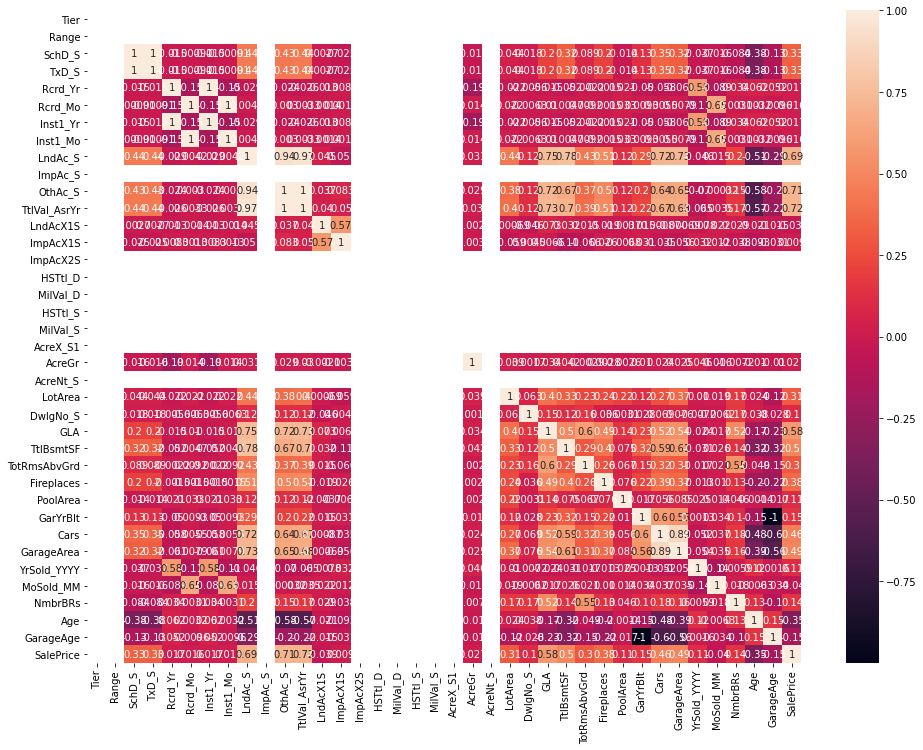

In [20]:
# check numerical features in target variable
fig, ax = plt.subplots(figsize=(16,12)) 
sns.heatmap(fdata.corr(), annot=True )

The heatmap shows some features have zero values in the entire column. These features need to be dropped as they contribute nothing to the model.

In [26]:
fdata.sum(axis=0)


Tier                                                            0
Range                                                           0
ZngCdPr         FS-RLRLF-PRDUCRMF-PRDFS-RLRLF-PRDF-PRDRLRLRLFS...
ClassPr_S       RESIDENTIALRESIDENTIALRESIDENTIALRESIDENTIALRE...
ClassSc_S       1-STORY 1946 & NEWER ALL STYLES1-STORY 1946 & ...
SchD_S                                                       4848
TxD_S                                                       22528
Rcrd_Yr                                               6.18123e+06
Rcrd_Mo                                                     20478
Inst1_Yr                                              6.18123e+06
Inst1_Mo                                                    20478
LndAc_S                                                 183739000
ImpAc_S                                                         0
OthAc_S                                                 566755700
TtlVal_AsrYr                                            750494700
ValType   

In [28]:
# drop variables
fdata.drop(['Tier', 'Range', 'ImpAc_S', 'ImpAcX2S', 'HSTtl_D', 
            'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1', 'AcreNt_S'], axis='columns', inplace=True)

<AxesSubplot:>

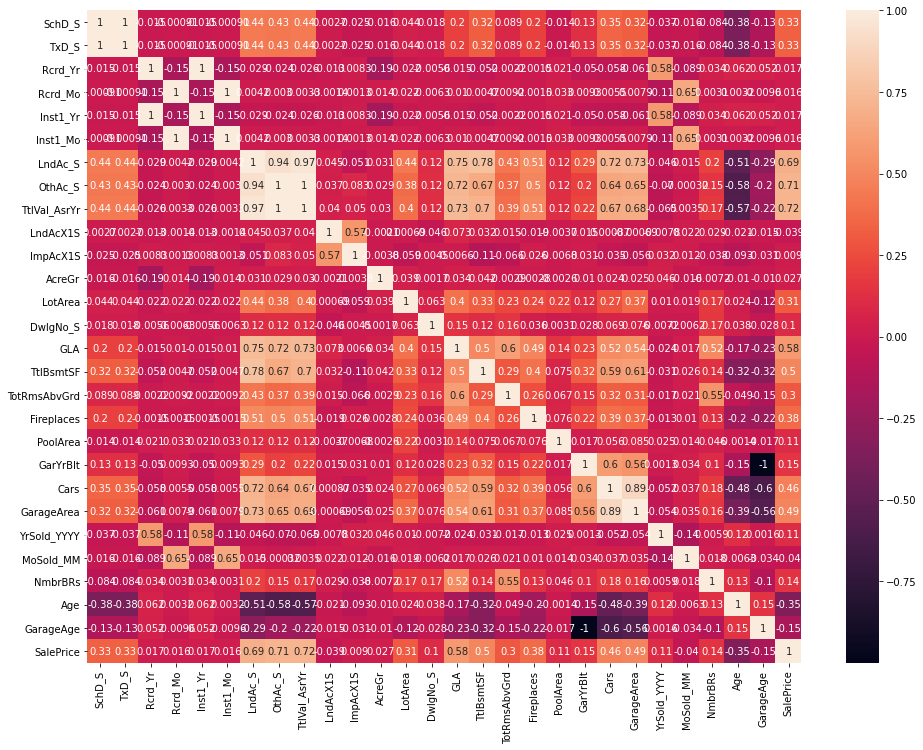

In [29]:
# check numerical features in target variable
fig, ax = plt.subplots(figsize=(16,12)) 
sns.heatmap(fdata.corr(), annot=True )

Numerical Features Discovery (high correlations):

SchD_S:
This feature should actually be categorical, not numerical. There are 2 school districts and the relationship should be tested via t-test.

TxD_S:
This feature should actually be categorical, not numerical. There are 2 tax districts and the relationship should be tested via t-test.

LndAc_S:
OthAc_S:
TtlVal_Asryr:
These features all correlate well to Sale Price...but, these come from the assessed value of different features of the property. Some people feel that while the assessed value of a property is different from the market value of a property they are still correlated. This is due to assessed value being a function of market value. I agree with this and I also feel that these assessments are not something people typically have access to when trying to estimate a sale price. These will be removed from the analysis/model.

Variables to Drop:
anything with correlation less than 10% to be inclusive:

Drop garage Area as Cars correlates well with it, it is actually a proxy for garage area.





In [42]:
fdata['SchD_S'] = fdata['SchD_S'].astype('category')

In [44]:
fdata['TxD_S']  = fdata['TxD_S'].astype('category')

In [56]:
num_cols_to_keep = [
 'LotArea',
 'DwlgNo_S',
 'GLA',
 'TtlBsmtSF',
 'TotRmsAbvGrd',
 'Fireplaces',
 'PoolArea',
 'Cars',
 'NmbrBRs',
 'SalePrice']

In [70]:
cols_to_drop = ['Rcrd_Yr',
 'Rcrd_Mo',
 'Inst1_Yr',
 'Inst1_Mo',
 'LndAc_S',
 'OthAc_S',
 'TtlVal_AsrYr',
 'LndAcX1S',
 'ImpAcX1S',
 'AcreGr']

In [69]:
fdata.corr().columns.to_list()

['Rcrd_Yr',
 'Rcrd_Mo',
 'Inst1_Yr',
 'Inst1_Mo',
 'LndAc_S',
 'OthAc_S',
 'TtlVal_AsrYr',
 'LndAcX1S',
 'ImpAcX1S',
 'AcreGr',
 'LotArea',
 'GLA',
 'TtlBsmtSF',
 'TotRmsAbvGrd',
 'GarYrBlt',
 'GarageArea',
 'YrSold_YYYY',
 'MoSold_MM',
 'Age',
 'GarageAge',
 'SalePrice']

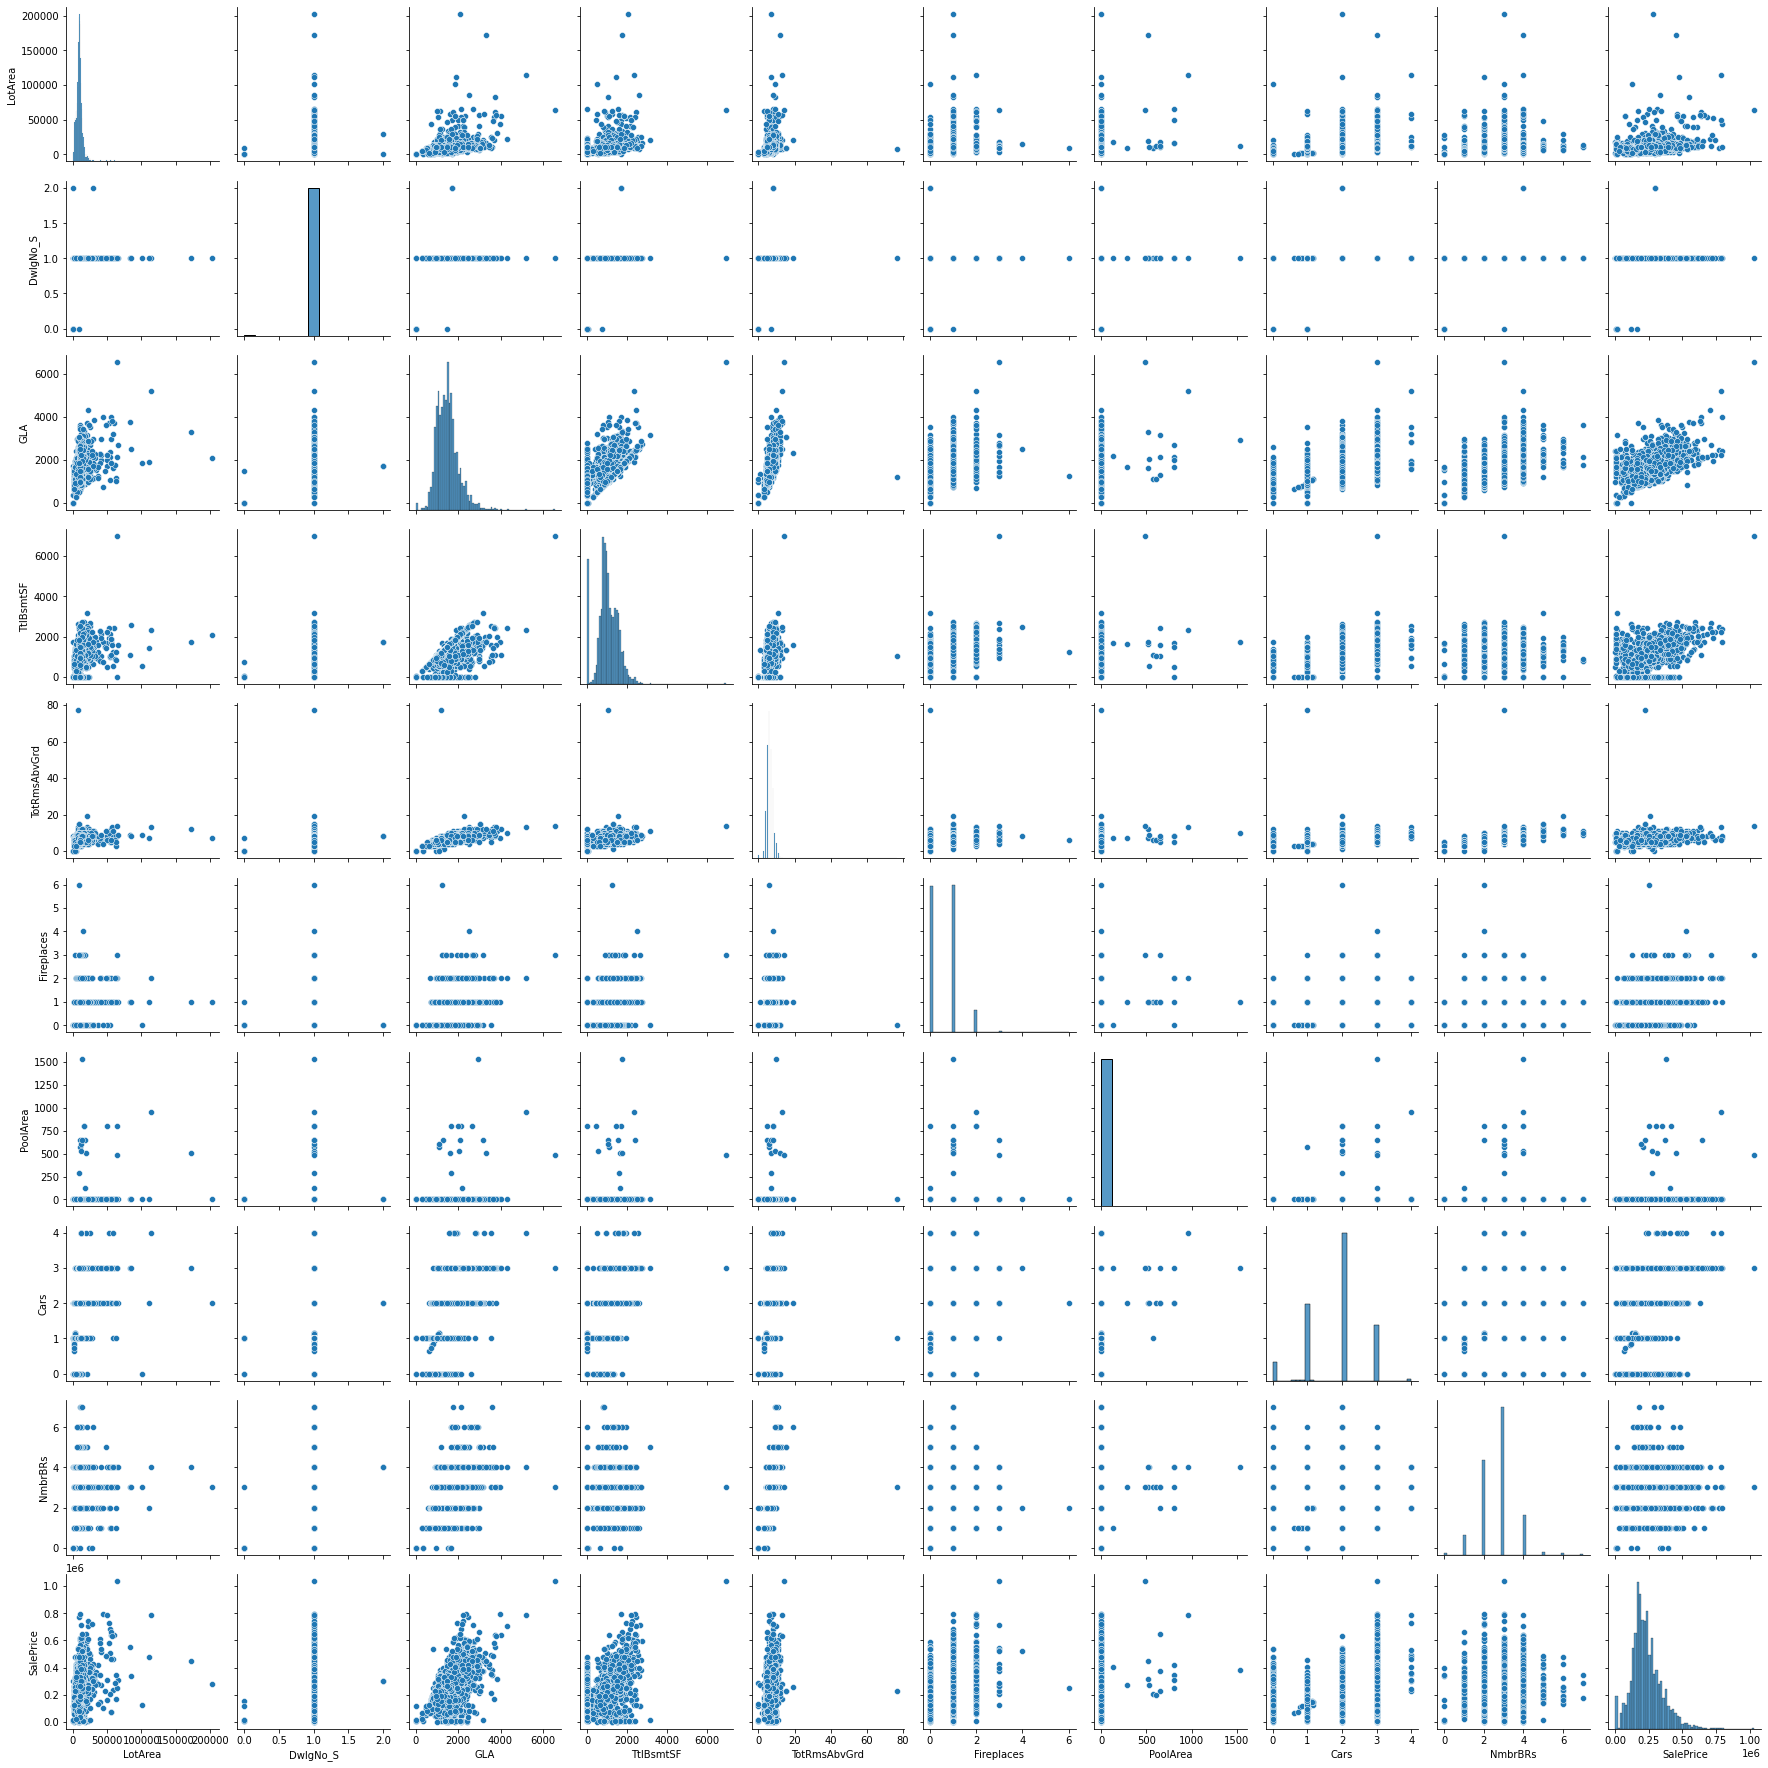

In [57]:
sns.pairplot(data=fdata[num_cols_to_keep])

After inspecting the pair  plots there are a few variables that need to be converted. PoolArea is dominated by the zero values which means that this feature should just be converted to a binary categorical variable, either the property has a pool or does not.

fireplaces, number of bedrooms, cars, and dwelling units need to be converted as well.


In [61]:
fdata['PoolArea'][fdata['PoolArea'] != 0] = 'Y'

In [63]:
fdata['PoolArea'][fdata['PoolArea'] == 0] = 'N'

In [65]:
for col in [
 'DwlgNo_S',
 'Fireplaces',
 'PoolArea',
 'Cars',
 'NmbrBRs']:
    fdata[col] = fdata[col].astype('category')

In [66]:
num_cols_to_keep = [
 'LotArea',
 'GLA',
 'TtlBsmtSF',
 'TotRmsAbvGrd',
 'SalePrice']

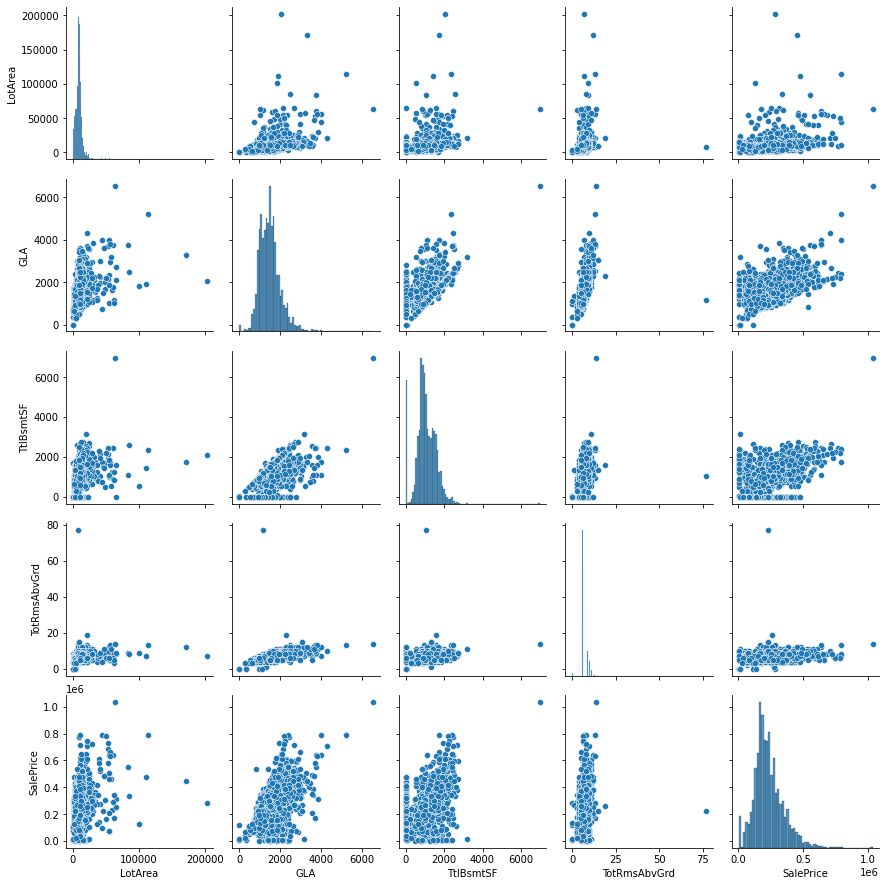

In [67]:
sns.pairplot(data=fdata[num_cols_to_keep])

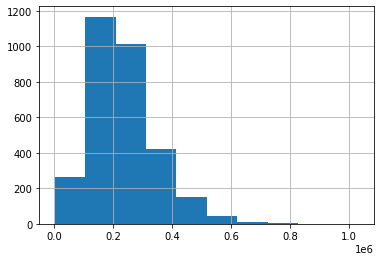

In [39]:
# take a quick peek at the target variable
fdata['SalePrice'].hist()
plt.show()

Take a look at the data with the changes made to numerical features and store the numerical features to keep for later use

In [71]:
fdata.drop(cols_to_drop, axis=1, inplace=True)

In [73]:
fdata.drop(['YrSold_YYYY', 'MoSold_MM'], axis=1, inplace=True)

In [74]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3080 entries, 12885 to 5108
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ZngCdPr       3080 non-null   object  
 1   ClassPr_S     3080 non-null   object  
 2   ClassSc_S     3080 non-null   object  
 3   SchD_S        3080 non-null   category
 4   TxD_S         3080 non-null   category
 5   Inst1_No      3061 non-null   object  
 6   Inst1TPr      3061 non-null   object  
 7   ValType       3080 non-null   object  
 8   Neighborhood  3080 non-null   object  
 9   LotArea       3080 non-null   float64 
 10  ParType       3080 non-null   object  
 11  DwlgNo_S      3080 non-null   category
 12  BldgType      3080 non-null   object  
 13  HouseStyle    3080 non-null   object  
 14  Foundation    3080 non-null   object  
 15  RoofMatl      3080 non-null   object  
 16  Ext1          3080 non-null   object  
 17  Ext2          3080 non-null   object  
 18  MasV

**Start looking at object/category type variables to run tests and identify which ones are pertinent to the model**

ClassPr_S: can be dropped...Residential for all values
Inst1_No: can be dropped..too many categories
ValType: can be dropped, people do not have access to this information easily
ParType: can be dropped, correlates well to DwlgNo_S
Foundation: can be dropped, foundation types most common dominate output

ClassSc_S: changed to category type
neighborhood: as expected has a lot of variation and can be converted to category type
BldgType: as expected has a lot of variation and can be converted to category type





In [ ]:
fdata.drop(['ClassPr_S', 'Inst1_No', 'ValType', 'ParType', 'Foundation'])
fdata['ClassSc_S'] = fdata['ClassSc_S'].astype('category')
fdata['Neighborhood'] = fdata['Neighborhood'].astype('category')

In [90]:
fdata.columns[(fdata.dtypes == 'object') | (fdata.dtypes == 'category')].to_list()

['ZngCdPr',
 'ClassPr_S',
 'ClassSc_S',
 'SchD_S',
 'TxD_S',
 'Inst1_No',
 'Inst1TPr',
 'ValType',
 'Neighborhood',
 'ParType',
 'DwlgNo_S',
 'BldgType',
 'HouseStyle',
 'Foundation',
 'RoofMatl',
 'Ext1',
 'Ext2',
 'MasVnrType',
 'Heating',
 'Central Air',
 'Fireplaces',
 'PoolArea',
 'GarageType',
 'Cars',
 'SaleType',
 'SaleCond',
 'ParclRel',
 'PA-Nmbr',
 'PA-Strt',
 'PA-StSfx',
 'Date',
 'Source',
 'NmbrBRs']

In [80]:
# convert object features to categorical
for col in fdata.columns[(fdata.dtypes == 'object') | (fdata.dtypes == 'category')].to_list():
    display(fdata[col].value_counts())

RL       1540
FS-RL     558
F-PRD     424
UCRM      239
F-VR      118
RH         97
RM         65
S-SMD      14
FS-RM       8
HOC         6
A           3
NC          2
RLP         2
GI          2
S-GA        1
S-HM        1
Name: ZngCdPr, dtype: int64

RESIDENTIAL    3080
Name: ClassPr_S, dtype: int64

1-STORY 1946 & NEWER ALL STYLES              1183
2-STORY 1946 & NEWER                          432
1-1/2 STORY FINISHED ALL AGES                 315
1-STORY TWNHM - 1946 & NEWER                  233
1-LEVEL CONDO 1946 & NEWER                    147
2-STORY TWNHM - 1946 & NEWER                  122
1-STORY 1945 & OLDER                          118
2-STORY 1945 & OLDER                          110
SPLIT OR MULTI-LEVEL                           94
DUPLEX - ALL STYLES AND AGES                   75
SPLIT FOYER                                    57
2-LEVEL CONDO 1946 & NEWER                     52
2 FAMILY CONVERSION - ALL STYLES AND AGES      52
2-1/2 STORY ALL AGES                           31
MULTILEVEL TWNHM  - INCL SPLIT LEV/FOYER       17
1-1/2 STORY - UNFINISHED ALL AGES              16
GARAGE UNIT-CONDO                              10
1-1/2 STORY CONDO - ALL AGES                    5
1-1/2 STORY TWNHM - ALL AGES                    3
STORAGE UNIT-CONDO                              2


1    2638
5     442
Name: SchD_S, dtype: int64

1     2638
45     442
Name: TxD_S, dtype: int64

2021-09751    4
2021-00896    4
2017-10495    4
2019-04379    4
2021-08297    3
             ..
2021-11046    1
2019-10152    1
2018-04869    1
2020-03107    1
2019-03826    1
Name: Inst1_No, Length: 2670, dtype: int64

WRDJSV        1609
WD            1149
Q              148
COD             59
D               30
COTAFF          20
CTR             15
SWD              9
ESMT             6
COT              4
AFF              4
BOS              2
SHD              2
ASM OF CTR       1
AFFLEST          1
O2               1
MSC              1
Name: Inst1TPr, dtype: int64

F    3003
B      33
P      29
I      14
A       1
Name: ValType, dtype: int64

N Ames     419
CollgCr    327
Edwards    230
OldTown    210
NRidgHt    185
Crawfor    139
Sawyer     132
NW Ames    119
Mitchel    115
Somerst    109
SawyerW    102
BrkSide    100
HaydnLk    100
IDOT&RR     87
Gilbert     83
NoRidge     74
Timber      71
GrnHill     60
ClearCr     54
Stonebr     45
MeadowV     35
S&W ISU     34
DakotaR     32
Br'Dale     30
IOCondo     30
Bluestm     29
Veenker     29
Blmngtn     29
NoPkVil     26
Landmrk     23
WllwCr1     11
WllwCr2      7
Greens       2
MsCondo      2
Name: Neighborhood, dtype: int64

Dwg&Lot    3065
Bld&Lot      12
2ndDwlg       3
Name: ParType, dtype: int64

1    3067
0      11
2       2
Name: DwlgNo_S, dtype: int64

1FamDet    2368
Twnhs-E     297
Condo       178
Twnhs-I     105
Duplex       77
2FmConv      55
Name: BldgType, dtype: int64

1-Story    1739
2-Story     747
1.5 Fin     339
S/Level     103
S/Foyer      91
2.5 Unf      25
1.5 Unf      16
2.5 Fin      10
No Data      10
Name: HouseStyle, dtype: int64

P'Conc     1405
C'Block    1193
Brk/Til     281
Slab        184
Stone        12
Wood          5
Name: Foundation, dtype: int64

CompShg    2977
Membran      52
Tar&Grv      25
WdShake      11
WdShngl       9
Roll          2
No Data       2
Metal         1
ClyTile       1
Name: RoofMatl, dtype: int64

VinylSd    1164
MetalSd     419
HdBoard     401
Wd Sdng     375
Plywood     197
CemntBd     195
BrkFace     177
Stucco       52
WdShing      49
AsbShng      38
BrkComm      10
C'Block       1
ImStucc       1
AsphShn       1
Name: Ext1, dtype: int64

VinylSd    1135
MetalSd     427
HdBoard     377
Wd Sdng     362
Plywood     219
CmentBd     190
BrkFace     137
Wd Shng      84
Stucco       65
AsbShng      31
Brk Cmn      27
ImStucc      15
Stone         4
Other         3
AsphShn       3
C'Block       1
Name: Ext2, dtype: int64

None       1676
BrkFace     741
Stone       562
No Data      76
Brk Cmn      25
Name: MasVnrType, dtype: int64

GasFWA     2992
GasHWat      25
OthElec      22
HeatPmp      12
Gravity      10
No Data      10
Geothrm       4
OthrHW        4
WallHtr       1
Name: Heating, dtype: int64

Yes    2946
No      134
Name: Central Air, dtype: int64

1.0    1429
0.0    1421
2.0     213
3.0      15
6.0       1
4.0       1
Name: Fireplaces, dtype: int64

N    3063
Y      17
Name: PoolArea, dtype: int64

Attachd    1903
Detachd     772
BuiltIn     134
None        127
No Data      68
Basment      48
2 Types      19
Carport       9
Name: GarageType, dtype: int64

2.0     1508
1.0      783
3.0      568
0.0      195
4.0       13
1.16       4
1.12       3
1.02       1
0.93       1
0.85       1
0.8        1
0.73       1
0.63       1
Name: Cars, dtype: int64

WRDConv    2789
NewSold     196
COD/Est      37
Other        29
WRDCash      14
CtrLD&I      10
CtrLwDn       2
CtrLInt       1
NewCost       1
Ctr15/2       1
Name: SaleType, dtype: int64

Normal     2571
Partial     202
Alloca      132
Abnorml     117
Family       46
AdjLand      12
Name: SaleCond, dtype: int64

Deed        3065
Contract      15
Name: ParclRel, dtype: int64

2205      27
415       19
2200      16
4511.0    15
1505      13
          ..
3309       1
2215.0     1
2219.0     1
2220.0     1
4100.0     1
Name: PA-Nmbr, Length: 1621, dtype: int64

ROWLING       50
TWAIN         45
WESTFIELD     44
EISENHOWER    43
CLARK         42
              ..
TURQUOISE      1
WINDSOR        1
BALSAM         1
TENNYSON       1
DARTMOOR       1
Name: PA-Strt, Length: 398, dtype: int64

AVE     941
DR      843
ST      531
RD      269
CIR     166
CT      134
PL       61
LN       44
BLVD     42
WAY      22
PKWY      8
SQ        2
Name: PA-StSfx, dtype: int64

31-Mar-22    3080
Name: Date, dtype: int64

Ames City Assessor    3080
Name: Source, dtype: int64

3.0    1473
2.0     947
4.0     400
1.0     195
5.0      31
0.0      18
6.0      13
7.0       3
Name: NmbrBRs, dtype: int64

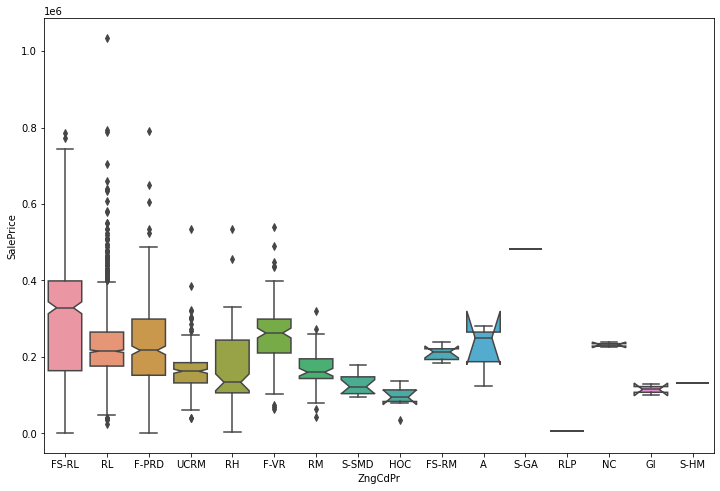

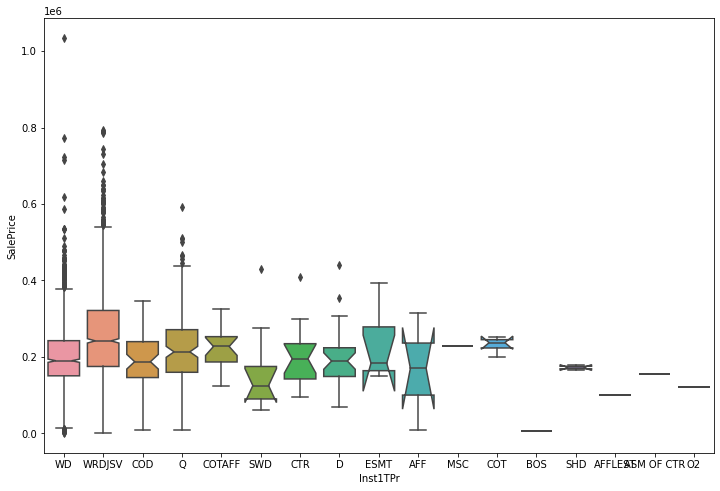

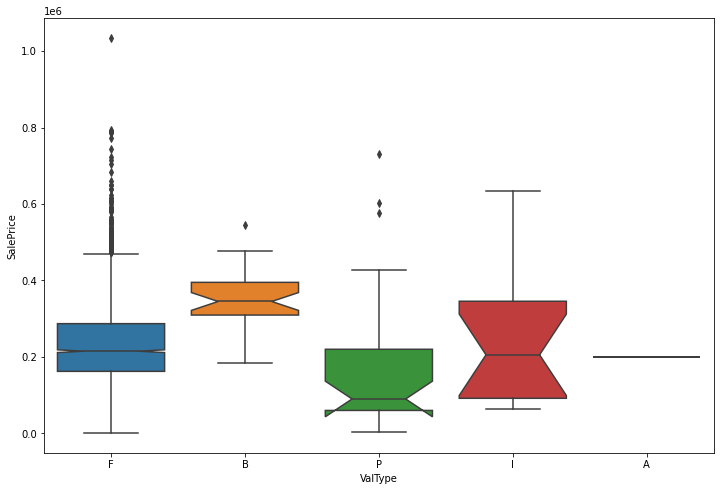

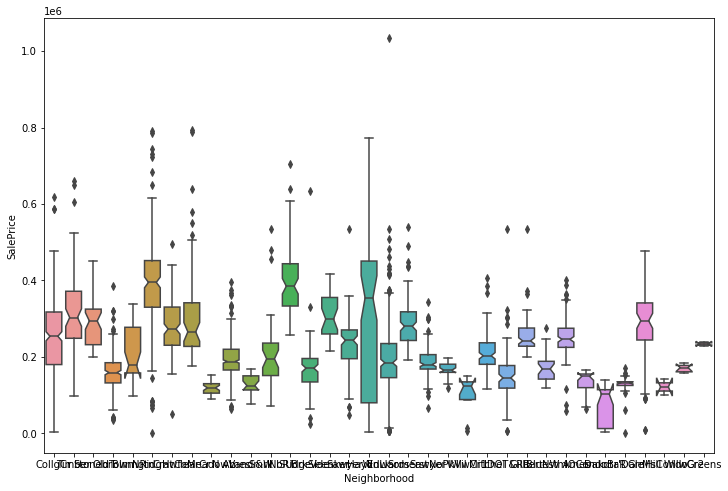

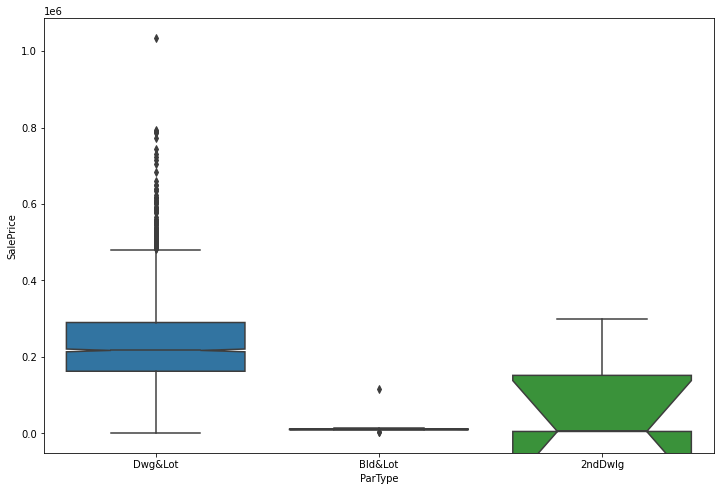

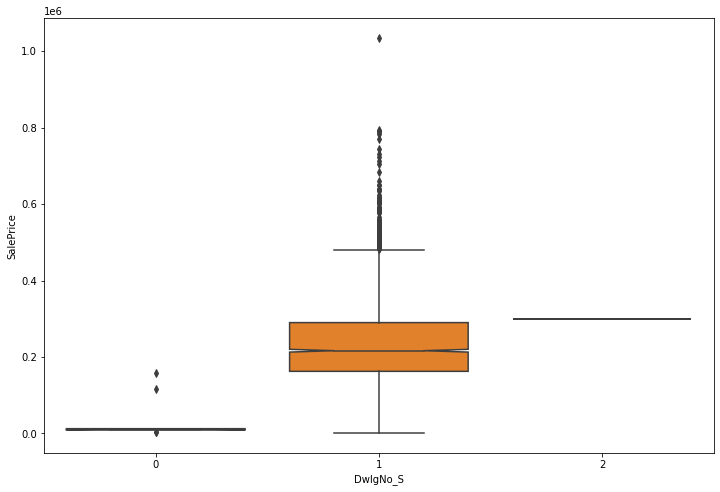

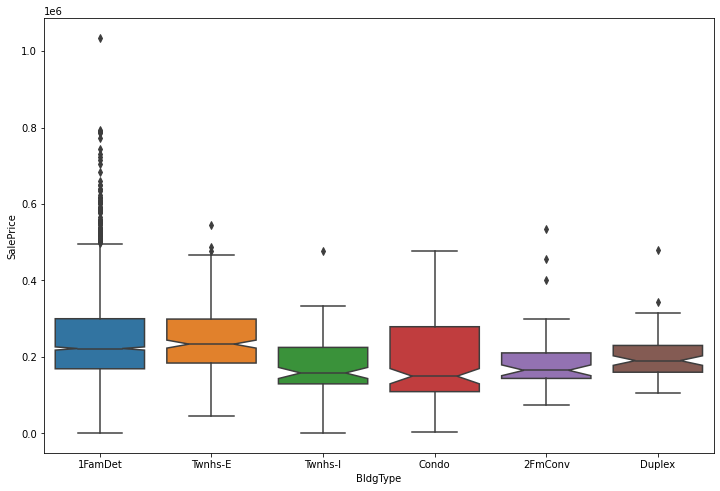

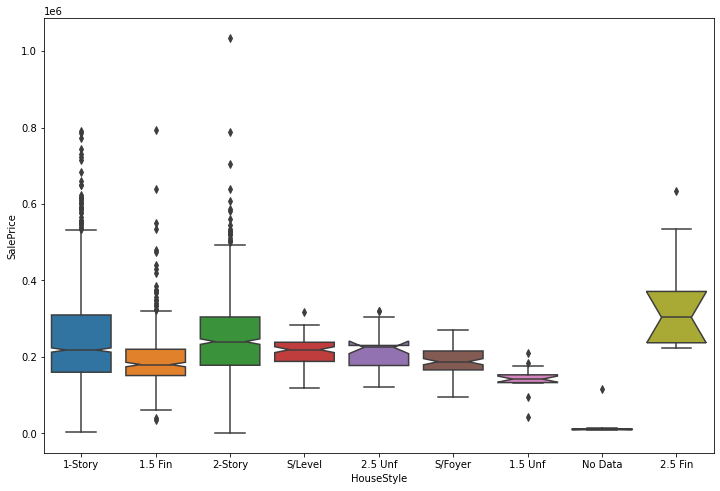

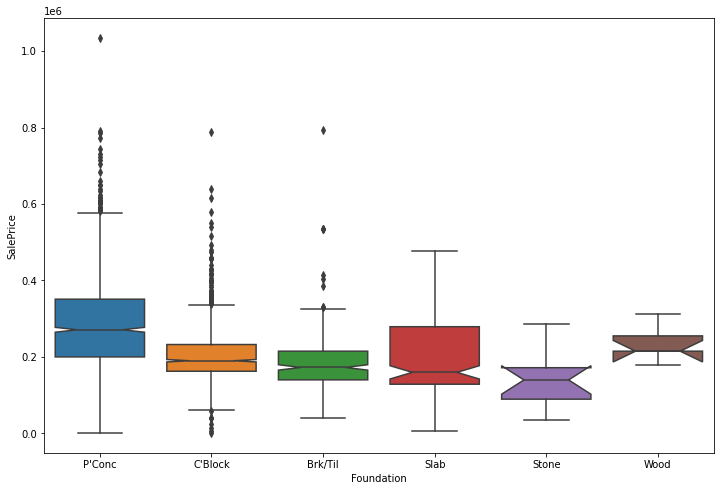

In [101]:
plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'ZngCdPr', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'Inst1TPr', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'ValType', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'Neighborhood', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'ParType', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'DwlgNo_S', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'BldgType', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'HouseStyle', y = 'SalePrice', notch=True)
plt.show()

plt.figure(figsize = (12,8))
sns.boxplot(data = fdata, x = 'Foundation', y = 'SalePrice', notch=True)
plt.show()


In [102]:
(fdata['Ext1'] != fdata['Ext2']).value_counts()

False    2511
True      569
dtype: int64

In [ ]:
from scipy.stats import ttest_ind



**Check whether the exterior columns are mostly similar.** If these columns are mainly identical then Exterior2nd will be dropped.

In [ ]:
assert np.sum(fdata['Exterior1st'] == fdata['Exterior2nd']) > .80 * len(fdata['Exterior1st'])

# drop exterior2nd
fdata.drop(['Exterior2nd'], axis = 'columns', inplace = True)

**Check all object variables and keep variables that show change in price given categorical breakdown and convert to categorical.**

In [ ]:
# check variables: MSZoning, Street, LotShape, LandContour
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(x = 'MSZoning',y = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(x = 'Street', y = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(x = 'LotShape', y = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(x = 'LandContour', y = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

# check variables: Utilities, LotConfig, LandSlope, Neighborhood
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(x = 'Utilities',y = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(x = 'LotConfig', y = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(x = 'LandSlope', y = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'Neighborhood', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

**Remove Street and Utilities as these variables show no distinction between groups as far as sale price.**

In [ ]:
# drop Street and Utilities
fdata.drop(['Street','Utilities'], axis = 'columns', inplace = True)

In [ ]:
# check variables: Condition1, Condition2, BldgType, HouseStyle
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'Condition1',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'Condition2', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'BldgType', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'HouseStyle', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

# check variables: RoofStyle, RoofMatl, Exterior1st, MasVnrType 
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'RoofStyle',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'RoofMatl', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'Exterior1st', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'MasVnrType', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

**Remove RoofMatl and Condition2 as these variables show no distinction between groups as far as sale price or have minimal points present across a few categories.**

In [ ]:
# drop RoofMatl and Condition2
fdata.drop(['RoofMatl','Condition2'], axis = 'columns', inplace = True)


In [ ]:
# check variables: ExterQual, ExterCond, Foundation, BsmtQual
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'ExterQual',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'ExterCond', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'Foundation', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'BsmtQual', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

# check variables: BsmtCond, BsmtFinType1, BsmtExposure, KitchenQual, BsmtFinType2
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'BsmtCond',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'BsmtFinType1', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'BsmtExposure', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'KitchenQual', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

# check variables: BsmtFinType2, Heating, HeatingQC, CentralAir
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'Heating',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'BsmtFinType2', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'HeatingQC', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'CentralAir', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

**Remove BsmtExposure and Heating as these variables show no distinction between groups as far as sale price or have minimal points present across a few categories.**

In [ ]:
# drop BsmtExposure and Heating and BsmtFinType2
fdata.drop(['BsmtExposure','Heating', 'BsmtFinType2'], axis = 'columns', inplace = True)

**MSSubClass should be categorical as the values define categories.**

In [ ]:
fdata['MSSubClass'] = fdata['MSSubClass'].astype('category') # convert MSSubClass


In [ ]:
# check variables: Electrical, Functional, GarageType, GarageFinish
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'Electrical',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'Functional', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'GarageType', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'GarageFinish', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

# check variables: GarageQual, GarageCond, PavedDrive, GarageFinish
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'GarageQual',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'GarageCond', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'PavedDrive', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'SaleCondition', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

# check variables: SaleType, SaleCondition
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'SaleType',x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

In [ ]:
# drop variables
fdata.drop(['GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'SaleType'], axis = 'columns', inplace = True)

In [ ]:
# replace Functional to Typical/Average and Other
func_rep_dict = {'Min1':'Other', 'Maj1': 'Other', 'Min2':'Other', 'Mod':'Other', 'Maj2':'Other', 'Sev':'Other'}

fdata['Functional'].replace(func_rep_dict, inplace = True)

In [ ]:
fdata.shape

Check the correlation for the numeric variables...

In [ ]:
# view scatterplot for correlation for numeric variables
sns.pairplot(fdata.iloc[:,40:])
plt.show()

In [ ]:
# get rid of columns that show minimal to no correlation
fdata.drop(['HalfBath', 'BedroomAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', '3SsnPorch', 'ScreenPorch'],
          axis = 'columns', inplace = True)


In [ ]:
fdata.drop(['MiscVal','MoSold','YrSold','EnclosedPorch'], axis = 'columns', inplace = True)

In [ ]:
# view scatterplot for correlation for numeric variables
sns.pairplot(fdata.iloc[:,30:])
plt.show()

In [ ]:
fdata.drop(['LowQualFinSF','BsmtFullBath', 'KitchenAbvGr', 'BsmtHalfBath'], axis = 'columns', inplace = True)

In [ ]:
fdata.shape

In [ ]:
fdata.drop(['LotArea','LotFrontage', 'OverallCond', 'YearBuilt','MasVnrArea', 'BsmtUnfSF','BsmtFinSF2', 'BsmtFinSF1'],
           axis = 'columns', inplace = True)

In [ ]:
sns.scatterplot(x = 'MasVnrType', y = 'SalePrice', data = fdata)
plt.show()
sns.scatterplot(x = 'GarageYrBlt', y = 'SalePrice', data = fdata)
plt.show()

gb_check = fdata.loc[:,['GarageYrBlt','SalePrice']].dropna() # heteroscedasticity 
np.corrcoef(gb_check.GarageYrBlt, gb_check.SalePrice)


In [ ]:
# drop GarageYrBlt due to small samples at older years
fdata.drop(['GarageYrBlt', 'MasVnrType'], axis = 'columns', inplace = True)

In [ ]:
for col in ['Electrical', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']:
    fdata[col] = fdata[col].fillna(fdata[col].mode()[0])
    print(fdata[col].isnull().sum())

By studying the distributions of the data as it relates to the sales price, the feature space was significantly reduced which will help the model perform better and more accurately highlight the contributions made by each of the remaining features.

In [ ]:
fdata.head()

<h2>3.0 Models</h2> <a id = 'models'></a>

***

### 3.1 - Random Forest <a id = 'rf'></a>


In [ ]:
# get key imports for modeling with RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import lightgbm

In [ ]:
# seperate target vector and feature matrix
X = fdata.drop(['SalePrice'], axis = 'columns')
y = fdata['SalePrice']

In [ ]:
# create dummy variables prior to loading into the model
X = pd.get_dummies(X)

In [ ]:
# create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state = 28)

In [ ]:
# set up pipe steps
steps = [('scaler', StandardScaler()), ('rf', RandomForestRegressor(random_state = 28))]

# create the pipeline
rf_model = Pipeline(steps)

# set parameters
params = {'rf__criterion': ['squared_error', 'absolute_error'],
         'rf__max_features': ['auto', 'sqrt', 'log2']}

# fit the object to the train set
rf_model = GridSearchCV(rf_model, params, cv=5)
rf_model.fit(X_train,y_train)

# cross val score
#cross_val_score(rf_model, X_train, y_train, cv = 5)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
plt.plot(y_test, y_pred, marker = '.', linestyle = 'none')
plt.title(f'The correlation coefficient is: {np.corrcoef(y_test,y_pred)[0][1]}')
plt.show()
plt.scatter(range(len(y_test)), (y_test-y_pred))
plt.title('The residuals are all centered around zero with the exception of a few outliers')
plt.show()
plt.hist((y_test - y_pred))
plt.show()

In [ ]:
# define RMSLE as a function
def rmsle(y_test, y_pred):
    vector_to_square = np.log(y_test + 1) - np.log(y_pred + 1)
    inside_avg = np.mean(vector_to_square**2)
    rmsle_value = np.sqrt(inside_avg)
    return rmsle_value

rmsle(y_test, y_pred)

### 3.2 - Linear Regression <a id = 'lr'></a>

In [ ]:
# set up pipe steps
lr_steps = [('scaler', StandardScaler()), ('lr', LinearRegression())]

# create the pipeline
lr_model = Pipeline(lr_steps)

# set parameters
# not worth using GridSearchCV

# fit to training set
lr_model.fit(X_train,y_train)

# predictions
y_pred = lr_model.predict(X_test)

# plot linear regression predictions
plt.plot(y_test, y_pred, marker = '.', linestyle = 'none', color='green')
plt.title('Linear Regression Model')
plt.show()

# print error metric
rmsle(y_test, y_pred)

The Random Forest Model performs better.

<h2>4.0 Testing & Evaluation</h2> <a id = 'testing_evaluation'></a>

***

### 4.1 Test Data - Cleaning & Preprocessing<a id = 'tdcap'></a>

In [ ]:
# load the data
test_data = pd.read_csv('test.csv')


In [ ]:
columns_to_keep = list(fdata.columns)[:-1]

In [ ]:
test_data = test_data[columns_to_keep]

In [ ]:
test_data.info()

In [ ]:
for col in list(test_data.columns):
    test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

In [ ]:
test_data.info()

In [ ]:
# convert to category like train data
test_data['MSSubClass'] = test_data['MSSubClass'].astype('category')

In [ ]:
test_data['Functional'].replace(func_rep_dict, inplace = True)

### 4.2 Retrain Model w/ Full Training Data<a id = 'rm'></a>

In [ ]:
# seperate target vector and feature matrix
X_train = fdata.drop(['SalePrice'], axis = 'columns')
y_train = fdata['SalePrice']

In [ ]:
X_train = pd.get_dummies(X_train).drop(['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Electrical_Mix'], axis = 'columns')

In [ ]:
X_train['MSSubClass_150'] = 0

X_train.shape

In [ ]:
# fit the model to the full train set
rf_model.fit(X_train,y_train)

# cross val score
cross_val_score(rf_model, X_train, y_train, cv = 5)

In [ ]:
# get the predictions for the test set
# rough expectation around .16 RMSLE
X_test = pd.get_dummies(test_data)
X_test.shape

In [ ]:
# fit model to get results
test_pred = rf_model.predict(X_test)

In [ ]:
# load in sample given
submission_format = pd.read_csv('sample_submission.csv')

In [ ]:
submission_format.SalePrice = test_pred

In [ ]:
submission_format.to_csv('submission_rf_model_best.csv', index=False)

### 4.3 Model Performance Score & Rank<a id = 'se'></a>

In [ ]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="score_rank.png", width=1000, height=1000)

This model and score ranked 3746/4655 which is not that good. The next iteration will have better additional models like xgboost, lightgbm, etc.